In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import stdev
import scipy.stats as sp
import arch
import statsmodels as sm
from ipywidgets import interact, IntSlider
import warnings
warnings.filterwarnings("ignore")

In [121]:
copper = pd.read_csv('../data/copper_10yrs.csv')
Y = np.array(copper.Open.values[::-1]) * 1000/0.45359237
r_copper = np.log(Y[1:] / Y[:-1])

In [148]:
S0 = Y[-1]
r = 0.02
T = 1/4
F = S0 * np.exp(r * T)
F

8628.939817675806

In [159]:
X = S0
X_095 = 0.95 * S0
X_105 = 1.02 * S0
sigma = np.sqrt(252) * stdev(r_copper)

C = S0 * sp.norm.cdf( (np.log(S0/X) + (r + sigma**2/2) * T) / sigma * np.sqrt(T) )  -  X * np.exp(-r*T) * sp.norm.cdf( (np.log(S0/X) + (r - sigma**2/2) * T) / sigma * np.sqrt(T) )
C_095 = S0 * sp.norm.cdf( (np.log(S0/X_095) + (r + sigma**2/2) * T) / sigma * np.sqrt(T) )  -  X_095 * np.exp(-r*T) * sp.norm.cdf( (np.log(S0/X_095) + (r - sigma**2/2) * T) / sigma * np.sqrt(T) )
C_105 = S0 * sp.norm.cdf( (np.log(S0/X_105) + (r + sigma**2/2) * T) / sigma * np.sqrt(T) )  -  X_105 * np.exp(-r*T) * sp.norm.cdf( (np.log(S0/X_105) + (r - sigma**2/2) * T) / sigma * np.sqrt(T) )
C

111.04830439075158

In [77]:
def strategies(futures, premium):

    copper = np.linspace(S0 - 200, S0 + 200, 1000)

    str_1 = np.zeros(len(copper))
    str_2 = copper - futures
    str_3 = np.vectorize(max)(copper - S0, 0) - premium

    plt.figure(figsize=(10, 6))
    plt.plot(copper, str_1, label='Strategia 1')
    plt.plot(copper, str_2, label='Strategia 2')
    plt.plot(copper, str_3, label='Strategia 3')
    plt.axvline(S0, linestyle='--', c='red')
    plt.grid()
    plt.legend()
    plt.show()

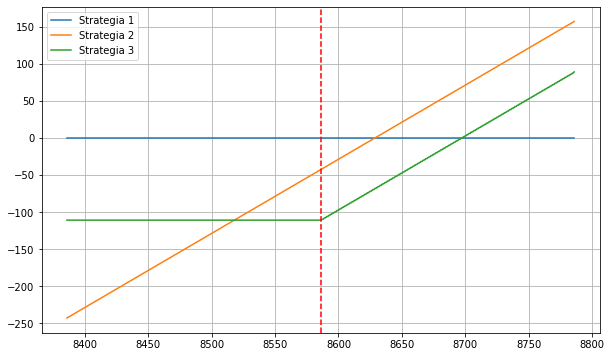

In [78]:
strategies(F, C)

In [7]:
interact(strategies,
        futures = IntSlider(min = 8000, max = 8900, step = 50, value = 8550, description = "Cena wykonania kontraktu forward"),
        premium = IntSlider(min = 0, max = 500, step = 10, value = 100, description = "Premia opcji kupna"))

interactive(children=(IntSlider(value=8550, description='Cena wykonania kontraktu forward', max=8900, min=8000…

<function __main__.strategies(futures, premium)>

# Geometryczy ruch Browna

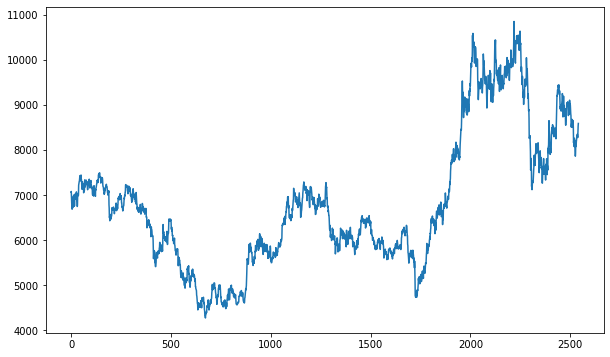

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(Y)
plt.show()

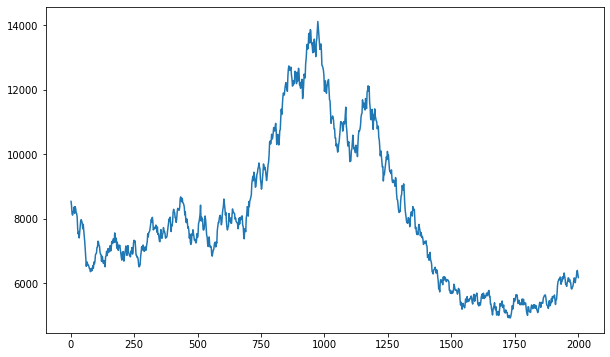

In [141]:
mu = np.mean(r_copper)
sigma = stdev(r_copper)
T = 2000
S0 = Y[-1]
n = 1000
ts = np.linspace(T/n, T, n)
Bt = np.cumsum(sp.norm.rvs(0, np.sqrt(T/n), n))
St = S0 * np.exp((mu - sigma**2 / 2) * ts + sigma * Bt)

plt.figure(figsize=(10, 6))
plt.plot(ts, St)
plt.show()

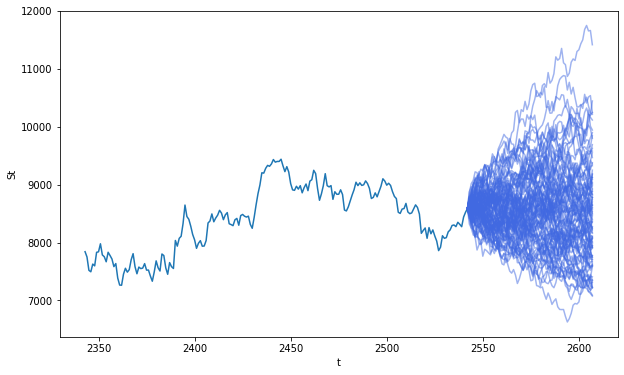

In [143]:
mu = np.mean(r_copper)
sigma = stdev(r_copper)
T = 65
S0 = Y[-1]
T0 = len(Y)
ts = np.linspace(0, T, T+1)

plt.figure(figsize=(10, 6))
plt.plot(range(1, T0 + 1)[-200:], Y[-200:])

MC = 100
St_table = np.zeros((T+1, MC))
for i in range(MC):
    Bt = np.cumsum(sp.norm.rvs(0, 1, T))
    Bt = np.insert(Bt, 0, 0)
    St = S0 * np.exp((mu - sigma**2 / 2) * ts + sigma * Bt)
    St_table[:, i] = St
    plt.plot(ts + T0, St, c='royalblue', alpha=0.5)

plt.xlabel("t")
plt.ylabel("St")
plt.show()

In [144]:
mu = np.mean(r_copper)
sigma = stdev(r_copper)
T = 65
S0 = Y[-1]
T0 = len(Y)
ts = np.linspace(0, T, T+1)

MC = 10000
St_table = np.zeros((T+1, MC))
for i in range(MC):
    Bt = np.cumsum(sp.norm.rvs(0, 1, T))
    Bt = np.insert(Bt, 0, 0)
    St = S0 * np.exp((mu - sigma**2 / 2) * ts + sigma * Bt)
    St_table[:, i] = St

X = St_table[-1, :]
str_1 = 0
str_2 = X - F
str_3 = np.vectorize(max)(X - S0, 0) - C
str_3_095 = np.vectorize(max)(X - S0, 0) - C_095
str_3_105 = np.vectorize(max)(X - S0, 0) - C_105

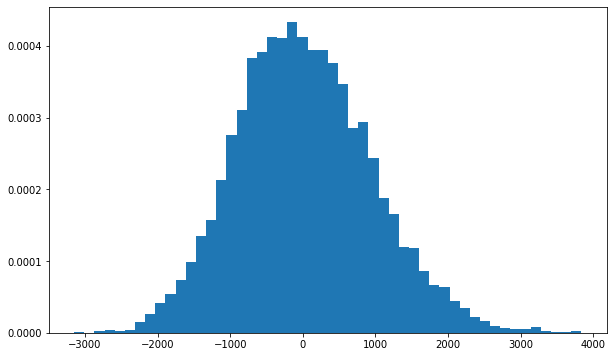

21.168677474742076

In [145]:
plt.figure(figsize=(10, 6))
plt.hist(str_2, bins=50, density=True)
plt.show()
np.mean(str_2)

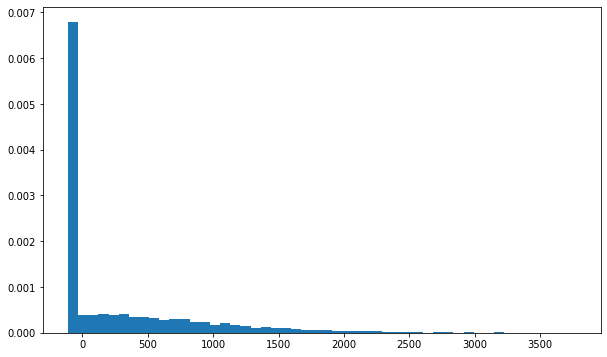

292.7043647326948

In [151]:
plt.figure(figsize=(10, 6))
plt.hist(str_3, bins=50, density=True)
plt.show()
np.mean(str_3)

In [171]:
print(np.quantile(str_2, 0.05))
print(np.quantile(str_3, 0.05))

-1428.6720878510107
-111.04830439075158


In [153]:
print(S0)
print(S0 * np.exp(mu * T))
print(F)

8585.902800790056
8586.067138474462
8628.939817675806


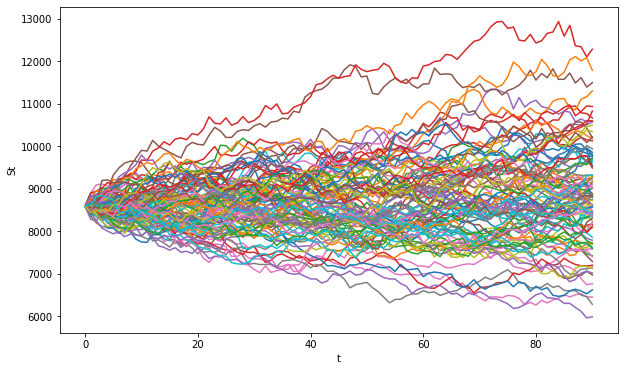

In [65]:
T = 90
S0 = Y[-1]
ts = np.linspace(0, T, T+1)

plt.figure(figsize=(10, 6))
MC = 100
St_table = np.zeros((T+1, MC))
for i in range(MC):
    Bt = np.cumsum(sp.norm.rvs(0, np.sqrt(1), T))
    Bt = np.insert(Bt, 0, 0)
    St = S0 * np.exp((mu - sigma**2 / 2) * ts + sigma * Bt)
    St_table[:, i] = St
    plt.plot(ts, St)

plt.xlabel("t")
plt.ylabel("St")
plt.show()